# Q1
To get a matrix C from multiplication of matrices A and B of size n x k and k x m respectively, number of multiplications required are n*m*k, and number of addition required is n*m*(k-1).
## Explanation
For each element C(i,j) :- <br>
<br>
$\sum_{n=1}^{k} A(i,n)*B(n,j) = C(i,j)$
<br>
Here for each element k products are generated. These products are then summed up which further require (k-1) operations.
<br>
Hence, in total :- <br>
Number of multiplications : n*m*k<br>
Number of additions : n*m*(k-1)


# Q2
Here is the pyhton code which multiplies two matrices, using two methods <br>
1. Using nested Lists
2. Using numpy 

In [10]:
import numpy as np
import time

def matrix_multiply(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])    
    C = [[0] * m for _ in range(n)]
   
    for i in range(n):
        for j in range(m):
            # Calculate C(i, j) by performing k multiplications and k-1 additions
            C[i][j] = sum(A[i][p] * B[p][j] for p in range(k))

    return C


A = np.random.rand(10, 50)  # Matrix of size (1000, 500)
B = np.random.rand(50, 40)   # Matrix of size (500, 800)
start_time=time.perf_counter()
D=np.dot(A,B)
end_time=time.perf_counter()

# print(D)
print("NumPy took ",-start_time+end_time,"seconds")
print("------")

start_time=time.perf_counter()
result = matrix_multiply(A, B)
end_time=time.perf_counter()
print("My function took ",-start_time+end_time," seconds")
# print(result)


NumPy took  0.00021650001872330904 seconds
------
My function took  0.02746330003719777  seconds
[[12.027698563986304, 12.959250888824446, 12.432974579108391, 12.541628679189397, 13.000644825247786, 12.381369551074165, 12.654203291821217, 12.18763120353658, 14.935258564718005, 13.169189528555252, 13.761789323968683, 11.860684716899204, 12.349037960265745, 13.67996707262151, 14.637953540967475, 12.599083782617111, 12.387769033079405, 13.317362065711722, 11.68002477713122, 14.599549336829007, 12.135230900192001, 11.182756673675607, 13.199830826901891, 11.777519308876014, 10.340444322285343, 13.039356513845616, 13.78466639102331, 12.675387201020996, 12.914094206959309, 12.778594597334862, 11.821327308435098, 12.932241011612213, 11.647199212582045, 12.25078717281049, 10.411189512878245, 14.924001455019186, 10.025661083975566, 11.984828947646614, 13.248247101416064, 11.492376703714587], [9.088972657357994, 11.854844308665722, 11.266274335096332, 10.856224800673102, 11.683394296842746, 10.76

Numpy will take less time.
## Explanation
NumPy uses low level, fast implementations, which results in less execution time. Using particularly large sized matrices gives NumPy the opportunity to shine where its optimized implementation can make a noticeable difference.

# Q3 
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. To find the median of the array using this method will require n*n/2 passes, where n is the size of the array. Hence the time complexity is of order $\ O(n^2)$. <br>

A better method would be to first sort the array and then lookup the middle element(s) for median. This would be of order $\ O(n*log(n))$



In [11]:
import numpy as np
import time
import random
A=[i for i in range(1,1001)]
def sortF(A):
    A=sorted(A)
    if(len(A) %2==1) :
        return A[len(A)//2]
    else: return (A[len(A)//2]+A[(len(A))//2 -1])*0.5

def F(A):
    copyA=A
    n = len(A)
    if n%2==1 :
        for _ in range(n//2) :
            maxI=0
            for i in range(len(copyA)):
                if copyA[i]>copyA[maxI]:
                    maxI=i
            copyA.pop(maxI)
        return max(A)
    else:
        for _ in range(n//2 -1):
            maxI=0
            for i in range(len(copyA)):
                if copyA[i]>copyA[maxI]:
                    maxI=i
            copyA.pop(maxI)
        max1=float('-inf')
        max2=float('-inf')
        for i in range(len(copyA)):
            if copyA[i]>max1:
                max1=copyA[i]
        for i in range(len(copyA)):
            if copyA[i]!= max1 and copyA[i]>max2:
                max2 = copyA[i]
        return max1*0.5 + max2*0.5


start_time=time.perf_counter()    
a=sortF(A)
end_time=time.perf_counter()
print(end_time-start_time," is t1")
print(a)

start_time=time.perf_counter()    
copyA=A.copy()
a=F(copyA)
end_time=time.perf_counter()
print(end_time-start_time," is t2")
print(a)

start_time=time.perf_counter()    
a=np.median(A)
end_time=time.perf_counter()
print(end_time-start_time," is t3")
print(a)
# print(A)







9.710004087537527e-05  is t1
500.5
0.06062250002287328  is t2
500.5
0.00035170000046491623  is t3
500.5


# Q4
$\ f(x, y)=x^2 *y + y^3*sin(x) $ <br><br>
$\frac{\partial f}{\partial x} = 2*x*y + y^3*cos(x)$ <br><br>
$\frac{\partial f}{\partial y} = x^2 + 3 *y^2* sin(x)$


# Q5 
Using JAX ro evaluate values 

In [12]:
# ! pip install jax jaxlib
import jax
import jax.numpy as jnp
# import numpy as np

def f(x,y):
    return x*x*y + y*y*y*jnp.sin(x)

grad_f=jax.grad(f,argnums=(0,1))

result1 = grad_f(jnp.pi/2,1.0)
print("Result for (pi/2,1): ",result) # Should be (pi,pi*2 +3)

result2 = grad_f(0.0,2.0)
print("Result for (0,2): ",result2) # Should be (8,0)


Result for (pi/2,1):  [[12.027698563986304, 12.959250888824446, 12.432974579108391, 12.541628679189397, 13.000644825247786, 12.381369551074165, 12.654203291821217, 12.18763120353658, 14.935258564718005, 13.169189528555252, 13.761789323968683, 11.860684716899204, 12.349037960265745, 13.67996707262151, 14.637953540967475, 12.599083782617111, 12.387769033079405, 13.317362065711722, 11.68002477713122, 14.599549336829007, 12.135230900192001, 11.182756673675607, 13.199830826901891, 11.777519308876014, 10.340444322285343, 13.039356513845616, 13.78466639102331, 12.675387201020996, 12.914094206959309, 12.778594597334862, 11.821327308435098, 12.932241011612213, 11.647199212582045, 12.25078717281049, 10.411189512878245, 14.924001455019186, 10.025661083975566, 11.984828947646614, 13.248247101416064, 11.492376703714587], [9.088972657357994, 11.854844308665722, 11.266274335096332, 10.856224800673102, 11.683394296842746, 10.760512721028759, 11.793307159347023, 11.003587700998278, 12.91641475075242, 1

# Q6
Using sympy 

In [60]:
# ! pip install sympy
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

grad_f = [sp.diff(f, var) for var in (x, y)]

print("Gradient:", grad_f)


Gradient: [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


# Q7
Creating a nested dictionary

In [ ]:
year={}
branch={}
roll={}
name={}
sub={}


dct={
    '2021' :{
        'Branch 1' :{ 
            1 :{
                'Roll_no' :'01',
                'Name':'P',
                'Marks':{
                'Maths':80,
                'English': 90
                }
            },
            2 :{
                'Roll_no' :'02',
                'Name':'Q',
                'Marks':{
                'Maths':84,
                'English': 85
                }
             },
        },
        'Branch 2' :{ 
            1 :{
                'Roll_no' :'03',
                'Name':'R',
                'Marks':{
                'Maths':83,
                'English': 92
                }
            },
            2 :{
                'Roll_no' :'04',
                'Name':'S',
                'Marks':{
                'Maths':85,
                'English': 90
                }
            },
       }
    }  
    # and so on, you can add another year     
}

# Q8
Using Python classes

In [ ]:
class Marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english

class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, students):
        self.students = students

class Year:
    def __init__(self, branches):
        self.branches = branches

class NestedDict:
    def __init__(self, years):
        self.years = years

# Creating instances for the given dictionary
student_1 = Student('01', 'P', {'Maths': 80, 'English': 90})
student_2 = Student('02', 'Q', {'Maths': 84, 'English': 85})
student_3 = Student('03', 'R', {'Maths': 83, 'English': 92})
student_4 = Student('04', 'S', {'Maths': 85, 'English': 90})

branch_1 = Branch({1: student_1, 2: student_2})
branch_2 = Branch({1: student_3, 2: student_4})

year_2021 = Year({'Branch 1': branch_1, 'Branch 2': branch_2})

nested_dict_instance = NestedDict({'2021': year_2021})


# Q9

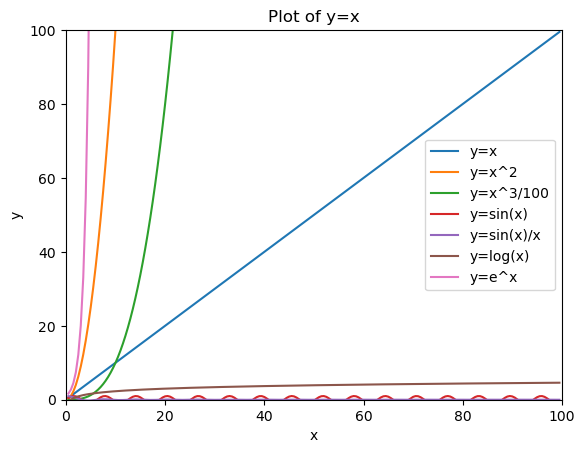

In [82]:
import matplotlib.pyplot as plt
x_values=np.arange(0.5,100,0.5)

def f1(x):
    y=[]
    for ele in x:
        y.append(ele)
    return y

def f2(x):
    y=[]
    for ele in x:
        y.append(ele*ele)
    return y

def f3(x):
    y=[]
    for ele in x:
        y.append(ele*ele*ele/100)
    return y

def f4(x):
    y=[]
    for ele in x:
        y.append(np.sin(ele))
    return y

def f5(x):
    y=[]
    for ele in x:
        y.append(np.sin(ele)/ele)
    return y

def f6(x):
    y=[]
    for ele in x:
        y.append(np.log(ele))
    return y

def f7(x):
    y=[]
    for ele in x:
        y.append(np.exp(ele))
    return y

y_values=f1(x_values)
plt.plot(x_values,y_values,label='y=x')
y_values=f2(x_values)
plt.plot(x_values,y_values,label='y=x^2')
y_values=f3(x_values)
plt.plot(x_values,y_values,label='y=x^3/100')
y_values=f4(x_values)
plt.plot(x_values,y_values,label='y=sin(x)')
y_values=f5(x_values)
plt.plot(x_values,y_values,label='y=sin(x)/x')
y_values=f6(x_values)
plt.plot(x_values,y_values,label='y=log(x)')
y_values=f7(x_values)
plt.plot(x_values,y_values,label='y=e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y=x')
plt.xlim(0,100)
plt.ylim(0,100)

plt.legend()
plt.show()
         

# Q10


In [63]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

col = df.std().idxmax()

row= df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)

print("\nColumn with the highest standard deviation:", col)
print("Row with the lowest mean:", row)


DataFrame:
           a         b         c         d         e
0   1.642032  1.084140  1.161629  1.898554  1.606429
1   1.009197  1.101472  1.663502  1.005062  1.160808
2   1.548734  1.691895  1.651961  1.224269  1.712179
3   1.237249  1.325400  1.746491  1.649633  1.849223
4   1.657613  1.568309  1.093675  1.367716  1.265202
5   1.243990  1.973011  1.393098  1.892047  1.631139
6   1.794811  1.502637  1.576904  1.492518  1.195243
7   1.722452  1.280772  1.024316  1.645472  1.177111
8   1.940459  1.953929  1.914864  1.370159  1.015457
9   1.928319  1.428184  1.966655  1.963620  1.853009
10  1.294449  1.385098  1.851137  1.316922  1.169493
11  1.556801  1.936155  1.696030  1.570061  1.097176
12  1.615007  1.990054  1.140084  1.518330  1.877373
13  1.740769  1.697016  1.702484  1.359491  1.293592
14  1.809361  1.810113  1.867072  1.913241  1.511342
15  1.501516  1.798295  1.649964  1.701967  1.795793
16  1.890005  1.337995  1.375583  1.093982  1.578280
17  1.035942  1.465598  1.542645  1

# Q11

In [64]:
df['f']=df[['a','b','c','d','e']].sum(axis=1)

df['g']=np.where(df['f']<8, 'LT8','GT8')

count_lt8 = df[df['g']=='LT8'].shape[0]
std_lt8 = df[df['g']=='LT8']['f'].std()
std_gt8 = df[df['g']=='GT8']['f'].std()

print(df)
print("\nNumber of rows where the value in column 'g' is 'LT8':", count_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_gt8)

           a         b         c         d         e         f    g
0   1.642032  1.084140  1.161629  1.898554  1.606429  7.392784  LT8
1   1.009197  1.101472  1.663502  1.005062  1.160808  5.940040  LT8
2   1.548734  1.691895  1.651961  1.224269  1.712179  7.829039  LT8
3   1.237249  1.325400  1.746491  1.649633  1.849223  7.807997  LT8
4   1.657613  1.568309  1.093675  1.367716  1.265202  6.952514  LT8
5   1.243990  1.973011  1.393098  1.892047  1.631139  8.133283  GT8
6   1.794811  1.502637  1.576904  1.492518  1.195243  7.562113  LT8
7   1.722452  1.280772  1.024316  1.645472  1.177111  6.850123  LT8
8   1.940459  1.953929  1.914864  1.370159  1.015457  8.194867  GT8
9   1.928319  1.428184  1.966655  1.963620  1.853009  9.139787  GT8
10  1.294449  1.385098  1.851137  1.316922  1.169493  7.017098  LT8
11  1.556801  1.936155  1.696030  1.570061  1.097176  7.856223  LT8
12  1.615007  1.990054  1.140084  1.518330  1.877373  8.140848  GT8
13  1.740769  1.697016  1.702484  1.359491  1.29

# Q12

In [87]:
# Create a 2x3 matrix
A = np.array([[1, 2, 3],
              [4, 5, 6]])

# Smaller array is broadcast accross the larger array so they have compatible shapes

# Add a scalar to the matrix using broadcasting
B = A + 10

# Multiply each element by a 1D array using broadcasting
C = A * np.array([1, 10, 100])

# Display the original matrix and the results
print("Original Matrix:")
print(A)

print("\nAfter Adding 10:")
print(B)

print("\nAfter Multiplying by [1, 10, 100]:")
print(C)


Original Matrix:
[[1 2 3]
 [4 5 6]]

After Adding 10:
[[11 12 13]
 [14 15 16]]

After Multiplying by [1, 10, 100]:
[[  1  20 300]
 [  4  50 600]]


# Q13


In [86]:
def custom_argmin(lst):
    min_idx=0
    min_val=lst[0]
    for i,value in enumerate(lst):
        if value<min_val:
            min_val=value
            min_idx=i
    return min_idx

lst = np.random.randint(0,100,20)
np_ans=np.argmin(lst)
custom_ans=custom_argmin(lst)
print("argmin :- ",np_ans)
print('-----')
print("custom:- ",custom_ans)

argmin :-  14
-----
custom:-  14
